# Oppgave 1

In [25]:
import numpy as np

#Oppgave 1a)
#Defining params

A = 0.1
epsilon = 0.25
omega = 1

In [26]:
# Defining given functions

def a(t):
    return epsilon * np.sin(omega * t)

def b(t):
    return 1 - 2 * epsilon * np.sin(omega * t)

def f(x, t):
    return a(t) * x**2 + b(t) * x

def fDelX(x, t):
    return 2 * a(t) * x + b(t)

def vX(x, y, t):
    return -np.pi * A * np.sin(np.pi * f(x, t)) * np.cos(np.pi * y)

def vY(x, y, t):
    return np.pi * A * np.cos(np.pi * f(x, t)) * np.sin(np.pi * y) * fDelX(x, t)

def coordDerived(coord, t):
    x = coord[0]
    y = coord[1]
    return (vX(x, y, t), vY(x, y, t))

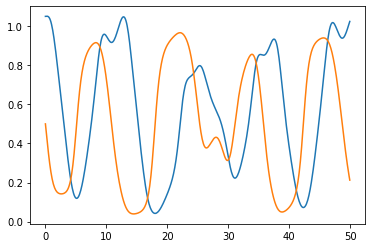

In [29]:
# Giving initial value to the coordinates-array

import matplotlib.pyplot as plt

h = 0.1
tList = np.arange(0, 50, h).tolist()

coordArr = np.zeros(len(tList)).tolist()
coordArr[0] = (1.05, 0.5)

for i in range(1, len(tList)):
    coordI = coordArr[i-1]
    ti = tList[i-1]
    k1 = coordDerived(coordI, ti)
    tempCoord = (coordI[0] + k1[0]*h, coordI[1] + k1[1]*h)
    k2 = coordDerived(tempCoord, ti)
    nextXCoord = coordI[0] + h/2*(k1[0] + k2[0])
    nextYCoord = coordI[1] + h/2*(k1[1] + k2[1])
    coordArr[i] = (nextXCoord, nextYCoord)

plt.plot(tList, coordArr)